<a href="https://colab.research.google.com/github/LiamSwick/Data-Science-Sandbox/blob/main/Review_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import re
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import string
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [183]:
df = pd.read_csv("/content/drive/MyDrive/user_courses_review_09_2023.csv", on_bad_lines="skip")
df.head()

,course_name,lecture_name,review_rating,review_comment
0,A/B Testing in Python,How to set up the A/B test,5,If she could provide more details about the pr...
1,A/B Testing in Python,How to set up the A/B test,5,nice
2,A/B Testing in Python,How to set up the A/B test,5,excellent course
3,A/B Testing in Python,How to set up the A/B test,5,nice
4,A/B Testing in Python,Conclusion,5,It was an experiential learning process


In [184]:
df.describe()

,course_name,lecture_name,review_rating,review_comment
count,10842,10832,10828,10639
unique,119,234,9,7191
top,Introduction to Data and Data Science,Why do we Need each of these Disciplines?,5,Excellent
freq,1736,1320,9648,385


In [185]:
nan_per_column = df.isna().sum()
print(nan_per_column)

course_name         0
lecture_name       10
review_rating      14
review_comment    203
dtype: int64


In [186]:
def clean_text(text):
  text = text.lower()
  text = text.translate(str.maketrans('', '', string.punctuation))
  return text

In [187]:
df['review_rating'] = pd.to_numeric(df['review_rating'], errors='coerce')
df_clean = df.dropna().copy()

df_clean['review_comment'] = df_clean['review_comment'].apply(clean_text)

comment_length = df_clean['review_comment'].apply(len)
df_clean['comment Length'] = comment_length
#nan_per_column = df_clean.isna().sum()
#print(nan_per_column)
df_clean.head()

,course_name,lecture_name,review_rating,review_comment,comment Length
0,A/B Testing in Python,How to set up the A/B test,5.0,if she could provide more details about the pr...,296
1,A/B Testing in Python,How to set up the A/B test,5.0,nice,4
2,A/B Testing in Python,How to set up the A/B test,5.0,excellent course,16
3,A/B Testing in Python,How to set up the A/B test,5.0,nice,4
4,A/B Testing in Python,Conclusion,5.0,it was an experiential learning process,39


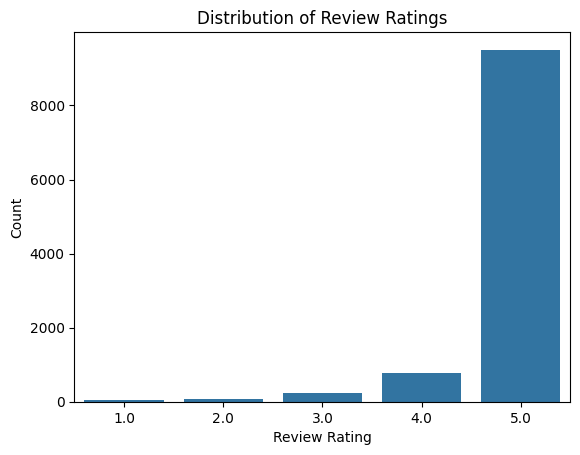

In [188]:
sns.countplot(x='review_rating', data=df_clean)
plt.title('Distribution of Review Ratings')
plt.xlabel('Review Rating')
plt.ylabel('Count')
plt.show()

<Axes: >

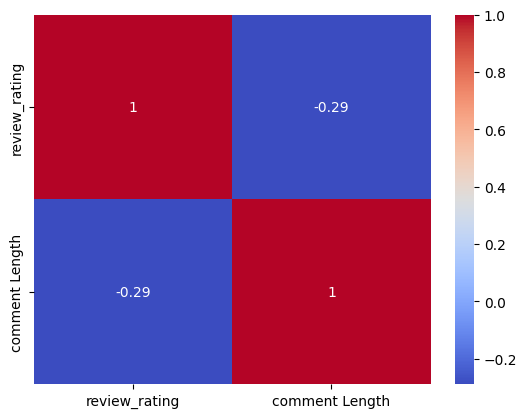

In [189]:
corr_df = df_clean[["review_rating","comment Length"]]
corr = corr_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [190]:
X = df_clean['review_comment']
y = df_clean['review_rating']

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)


In [192]:
print(X_train.shape)
print(X_test.shape)
print(" ")
print(y_train.shape)
print(y_test.shape)

(8509,)
(2128,)
 
(8509,)
(2128,)


In [193]:
vectorizer = TfidfVectorizer(stop_words='english')
mod = MultinomialNB()

text_clf = make_pipeline(vectorizer, mod)

In [194]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(stop_words='english')),
                ('multinomialnb', MultinomialNB())])

In [195]:
yhat = text_clf.predict(X_test)
report = classification_report(y_test, yhat)
conf_matrix = confusion_matrix(y_test, yhat)

print(report)
print(conf_matrix)

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        11
         2.0       0.00      0.00      0.00        11
         3.0       0.00      0.00      0.00        55
         4.0       0.00      0.00      0.00       160
         5.0       0.89      1.00      0.94      1891

    accuracy                           0.89      2128
   macro avg       0.18      0.20      0.19      2128
weighted avg       0.79      0.89      0.84      2128

[[   0    0    0    0   11]
 [   0    0    0    0   11]
 [   0    0    0    0   55]
 [   0    0    0    0  160]
 [   0    0    0    0 1891]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [196]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample

In [197]:
df_minority = df_clean[df_clean.review_rating < 5]
df_majority = df_clean[df_clean.review_rating == 5]

In [198]:
df_minority_oversampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=37)

df_resampled = pd.concat([df_majority, df_minority_oversampled])

print("New class distribution after resampling:")
print(df_resampled['review_rating'].value_counts())

New class distribution after resampling:
review_rating
5.0    9505
4.0    6475
3.0    2036
2.0     626
1.0     368
Name: count, dtype: int64


In [199]:
x_resampled = df_resampled['review_comment']
y_resampled = df_resampled['review_rating']
x_train_re, x_test_re, y_train_re, y_test_re = train_test_split(x_resampled, y_resampled, test_size=0.2)

text_clf_2 = make_pipeline(vectorizer, mod)
print(np.shape(y_train_re))
text_clf.fit(x_train_re, y_train_re)

text_clf = make_pipeline(vectorizer, mod)
yhat_re = text_clf.predict(x_test_re)
report = classification_report(y_test_re, yhat_re)
conf_matrix = confusion_matrix(y_test_re, yhat_re)

print(report)
print(conf_matrix)

(15208,)
              precision    recall  f1-score   support

         1.0       1.00      0.31      0.47        71
         2.0       1.00      0.38      0.55       104
         3.0       0.93      0.52      0.67       409
         4.0       0.69      0.65      0.67      1291
         5.0       0.76      0.90      0.82      1927

    accuracy                           0.75      3802
   macro avg       0.87      0.55      0.64      3802
weighted avg       0.76      0.75      0.74      3802

[[  22    0    4   26   19]
 [   0   39    7   45   13]
 [   0    0  214  123   72]
 [   0    0    0  839  452]
 [   0    0    6  187 1734]]


In [200]:
labels = []
for score in df_clean["review_rating"]:
  if score <= 3:
    labels.append(0) #Zero will correspond to bad reviews
  else:
    labels.append(1) #One will label good reviews

df_clean["label"] = labels
#df_clean.head()


In [201]:
x_new = df_clean["review_comment"]
y_new = df_clean["label"]

x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, y_new, test_size=0.2, random_state=42)

text_clf.fit(x_train_new, y_train_new)

yhat_new = text_clf.predict(x_test_new)
report = classification_report(y_test_new, yhat_new)
conf_matrix = confusion_matrix(y_test_new, yhat_new)

print(report)
conf_matrix

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        78
           1       0.96      1.00      0.98      2050

    accuracy                           0.96      2128
   macro avg       0.48      0.50      0.49      2128
weighted avg       0.93      0.96      0.95      2128



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array([[   0,   78],
       [   0, 2050]])

In [202]:
df_minority = df_clean[df_clean.label == 0]
df_majority = df_clean[df_clean.label == 1]

In [203]:
df_minority_oversampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=37)

df_resampled = pd.concat([df_majority, df_minority_oversampled])

print("New class distribution after resampling:")
print(df_resampled['review_rating'].value_counts())

New class distribution after resampling:
review_rating
5.0    9505
3.0    6824
2.0    2137
1.0    1309
4.0     765
Name: count, dtype: int64


In [204]:
x_new = df_resampled["review_comment"]
y_new = df_resampled["label"]

x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, y_new, test_size=0.2, random_state=42)

text_clf.fit(x_train_new, y_train_new)

yhat_new = text_clf.predict(x_test_new)
report = classification_report(y_test_new, yhat_new)
conf_matrix = confusion_matrix(y_test_new, yhat_new)

print(report)
conf_matrix

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2066
           1       0.93      0.92      0.93      2042

    accuracy                           0.93      4108
   macro avg       0.93      0.93      0.93      4108
weighted avg       0.93      0.93      0.93      4108



array([[1927,  139],
       [ 160, 1882]])

In [205]:
logit = LogisticRegression(max_iter=400)
text_clf_logit = make_pipeline(vectorizer, logit)
text_clf_logit.fit(x_train_new, y_train_new)

y_pred_logit = text_clf_logit.predict(x_test_new)
report = classification_report(y_test_new, y_pred_logit)
conf_matrix_logit = confusion_matrix(y_test_new, y_pred_logit)

print(report)
conf_matrix_logit

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2066
           1       0.94      0.95      0.94      2042

    accuracy                           0.94      4108
   macro avg       0.94      0.94      0.94      4108
weighted avg       0.94      0.94      0.94      4108



array([[1935,  131],
       [ 109, 1933]])

In [209]:
nb_accuracy = accuracy_score(y_test_new, yhat_new)
nb_f1 = f1_score(y_test_new, yhat_new)
logit_accuracy = accuracy_score(y_test_new, y_pred_logit)
logit_f1 = f1_score(y_test_new, y_pred_logit)

print(f"Naive Bayes Model: Accuracy = {nb_accuracy:.3f}, F1-score = {nb_f1:.3f}")
print(f"Logistic Regression Model: Accuracy = {logit_accuracy:.3f}, F1-score = {logit_f1:.3f}")

Naive Bayes Model: Accuracy = 0.927, F1-score = 0.926
Logistic Regression Model: Accuracy = 0.942, F1-score = 0.942


In [210]:
df_eval = pd.read_csv('/content/drive/MyDrive/user_courses_review_test_set.csv', on_bad_lines='skip')
#df_eval.head()

,course_name,lecture_name,review_rating,review_comment
0,Advanced Microsoft Excel,F1 to F12 - Using Excel's Function Keys,5,perfect
1,Agile and Scrum Project Management,Agile vs Waterfall - Conclusions,1,The SCRUM chapter are full of errors
2,AI Applications for Business Success,Correlation vs. Causation,3,Bad quality of audio and narrative
3,AI Applications for Business Success,Correlation vs. Causation,3,I need documentation about lecture.
4,Building a 3-Statement Model in Excel,Calculating Cash Flows and Completing the Mode...,5,Great course! Ned has a talent for explaining ...


In [215]:
df_eval['review_rating'] = pd.to_numeric(df_eval['review_rating'], errors='coerce')
df_eval_clean = df_eval.dropna().copy()

df_eval_clean['review_comment'] = df_eval_clean['review_comment'].apply(clean_text)
df_eval_clean.head()

labels = []
for score in df_eval_clean["review_rating"]:
  if score <= 3:
    labels.append(0)
  else:
    labels.append(1)
df_eval_clean["label"] = labels

df_eval_clean.head()

,course_name,lecture_name,review_rating,review_comment,label
0,Advanced Microsoft Excel,F1 to F12 - Using Excel's Function Keys,5,perfect,1
1,Agile and Scrum Project Management,Agile vs Waterfall - Conclusions,1,the scrum chapter are full of errors,0
2,AI Applications for Business Success,Correlation vs. Causation,3,bad quality of audio and narrative,0
3,AI Applications for Business Success,Correlation vs. Causation,3,i need documentation about lecture,0
4,Building a 3-Statement Model in Excel,Calculating Cash Flows and Completing the Mode...,5,great course ned has a talent for explaining t...,1


In [219]:
from sklearn.metrics import accuracy_score, f1_score

X_eval = df_eval_clean['review_comment']
y_eval = df_eval_clean['label']

y_pred_eval_logit = text_clf_logit.predict(X_eval)

eval_logit_accuracy = accuracy_score(y_eval, y_pred_eval_logit)
eval_logit_f1 = f1_score(y_eval, y_pred_eval_logit)

report = classification_report(y_eval, y_pred_eval_logit)
conf_matrix = confusion_matrix(y_eval, y_pred_eval_logit)
accuracy = conf_matrix.diagonal().sum() / conf_matrix.sum()

print(report)
print(f"Logistic Regression Model on Evaluation Data: Accuracy = {accuracy:.3f}, F1-score = {eval_logit_f1:.3f}")

              precision    recall  f1-score   support

           0       0.35      0.62      0.44        13
           1       0.96      0.89      0.92       137

    accuracy                           0.87       150
   macro avg       0.65      0.75      0.68       150
weighted avg       0.91      0.87      0.88       150

Logistic Regression Model on Evaluation Data: Accuracy = 0.867, F1-score = 0.924
